In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Ładowanie zmiennych środowiskowych
load_dotenv()

db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_database = os.getenv("DB_DATABASE")

conn = (
    f"mssql+pyodbc://{db_user}:{db_password}@{db_host}:{db_port}/{db_database}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
)
engine = create_engine(conn)
print("Connection successful!")

Connection successful!


- Temperatura powietrza
- Opady (sniegu, deszczu)
- Poziomy wod (studnie, rzeki) X
- Pokrywa śnieżna X
- Mokradla X

# Srednia temperatura od 2000 do 2024 z podziałem na miesiące

In [105]:
# Mean temperature between 2000 and 2023
meantemp_by_year_by_month = """
SELECT
    YEAR(d.data) AS Year,
    MONTH(d.data) AS Month,
    AVG(TemperaturaPowietrza) AS AvgTemp
FROM
    Depesze d
WHERE YEAR(d.data) BETWEEN 2000 AND 2023
GROUP BY
    YEAR(d.data),MONTH(d.data)
order by Year, Month
"""

In [106]:
# Pobranie danych
df = pd.read_sql_query(meantemp_by_year_by_month, engine)
df

,Year,Month,AvgTemp
0,2000,1,-1.506228
1,2000,2,2.165239
2,2000,3,3.275327
3,2000,4,11.409269
4,2000,5,14.462465
...,...,...,...
283,2023,8,19.267307
284,2023,9,17.379294
285,2023,10,10.674851
286,2023,11,3.874097


In [107]:
# Sprawdzenie i raportowanie zduplikowanych oraz brakujących wartości
print("Liczba zduplikowanych wierszy:", df.duplicated().sum())
print("Liczba brakujących wartości:", df.isnull().sum().sum())

# Obsługa duplikatów
df = df.drop_duplicates()

# Obsługa brakujących wartości, jeśli istnieją. W tym miejscu usuwamy wiersze z brakującymi wartościami, ale można je również wypełnić.
df = df.dropna()

# Informacja po czyszczeniu danych
print("Kształt danych po czyszczeniu:", df.shape)

# Tworzenie wykresu
fig = px.line(df, x='Month', y='AvgTemp', color='Year',
              title='Średnia temperatura miesięczna w ciągu lat',
              labels={
                  'Month': 'Miesiąc',
                  'AvgTemp': 'Średnia temperatura (°C)',
                  'Year': 'Rok'
              })

# Poprawa czytelności wykresu i wycentrowanie tytułu
fig.update_layout(title_x=0.5,
                  xaxis=dict(tickmode='array', tickvals=list(range(1, 13)))#,
                  # xaxis_title='Miesiąc',
                  # yaxis_title='Średnia temperatura (°C)'
                  )

# Wyświetlenie wykresu
fig.show()

Liczba zduplikowanych wierszy: 0
Liczba brakujących wartości: 0
Kształt danych po czyszczeniu: (288, 3)


In [108]:
df_wczesne_lata=df[df['Year']<2005]

fig = px.line(df_wczesne_lata, x='Month', y='AvgTemp', color='Year',
              title='Średnia temperatura miesięczna w ciągu lat',
              labels={
                  'Month': 'Miesiąc',
                  'AvgTemp': 'Średnia temperatura (°C)',
                  'Year': 'Rok'
              })

# Poprawa czytelności wykresu i wycentrowanie tytułu
fig.update_layout(title_x=0.5,
                  xaxis=dict(tickmode='array', tickvals=list(range(1, 13))),
                  xaxis_title='Miesiąc',
                  yaxis_title='Średnia temperatura (°C)')

# Wyświetlenie wykresu
fig.show()

In [109]:
df_wczesne_lata_2=df[(df['Year']>=2005) & (df['Year']<2010)]

fig = px.line(df_wczesne_lata_2, x='Month', y='AvgTemp', color='Year',
              title='Średnia temperatura miesięczna w ciągu lat',
              labels={
                  'Month': 'Miesiąc',
                  'AvgTemp': 'Średnia temperatura (°C)',
                  'Year': 'Rok'
              })

# Poprawa czytelności wykresu i wycentrowanie tytułu
fig.update_layout(title_x=0.5,
                  xaxis=dict(tickmode='array', tickvals=list(range(1, 13))),
                  xaxis_title='Miesiąc',
                  yaxis_title='Średnia temperatura (°C)')

# Wyświetlenie wykresu
fig.show()

In [54]:
df_wczesne_lata_3=df[(df['Year']>=2010) & (df['Year']<2015)]

fig = px.line(df_wczesne_lata_3, x='Month', y='AvgTemp', color='Year',
              title='Średnia temperatura miesięczna w ciągu lat',
              labels={
                  'Month': 'Miesiąc',
                  'AvgTemp': 'Średnia temperatura (°C)',
                  'Year': 'Rok'
              })

# Poprawa czytelności wykresu i wycentrowanie tytułu
fig.update_layout(title_x=0.5,
                  xaxis=dict(tickmode='array', tickvals=list(range(1, 13))),
                  xaxis_title='Miesiąc',
                  yaxis_title='Średnia temperatura (°C)')

# Wyświetlenie wykresu
fig.show()

# Porównanie mediany ze średnią temperatury z podziałem na rok i miesiące

In [110]:
#Pobranie mediany sredniej temperatury dla kazdego miesiaca
median_temps_by_month = df.groupby('Month')["AvgTemp"].median().reset_index().rename(columns={"AvgTemp": "MedianTemp"})
median_temps_by_month

,Month,MedianTemp
0,1,-1.299941
1,2,-0.158841
2,3,3.257428
3,4,8.239090
4,5,13.062503
5,6,17.105825
6,7,18.835993
7,8,18.453166
8,9,13.848085
9,10,9.754981


In [111]:
merged_df = pd.merge(df, median_temps_by_month, on='Month')
merged_df['TempDiff'] = merged_df['AvgTemp'] - merged_df['MedianTemp']
merged_df

,Year,Month,AvgTemp,MedianTemp,TempDiff
0,2000,1,-1.506228,-1.299941,-0.206287
1,2000,2,2.165239,-0.158841,2.324080
2,2000,3,3.275327,3.257428,0.017899
3,2000,4,11.409269,8.239090,3.170179
4,2000,5,14.462465,13.062503,1.399962
...,...,...,...,...,...
283,2023,8,19.267307,18.453166,0.814141
284,2023,9,17.379294,13.848085,3.531209
285,2023,10,10.674851,9.754981,0.919870
286,2023,11,3.874097,4.997383,-1.123286


In [97]:
merged_df_sorted = merged_df.sort_values(by=['Year','Month'], ascending=False)
merged_df_sorted

,Year,Month,AvgTemp,MedianTemp,TempDiff
287,2023,12,1.778026,1.147956,0.630070
286,2023,11,3.874097,4.997383,-1.123286
285,2023,10,10.674851,9.754981,0.919870
284,2023,9,17.379294,13.848085,3.531209
283,2023,8,19.267307,18.453166,0.814141
...,...,...,...,...,...
4,2000,5,14.462465,13.062503,1.399962
3,2000,4,11.409269,8.239090,3.170179
2,2000,3,3.275327,3.257428,0.017899
1,2000,2,2.165239,-0.158841,2.324080


In [112]:
pivot_tab = merged_df_sorted.pivot(index="Year", columns="Month",values="TempDiff")
pivot_tab

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2000,-0.206287,2.324080,0.017899,3.170179,1.399962,-0.495701,-3.016064,-0.854944,-1.978521,1.840255,1.433651,0.694849
2001,0.753110,-0.207598,-1.049110,-0.752363,0.364681,-2.959690,0.495946,0.219567,-2.564635,1.329852,-2.643262,-4.644409
2002,0.330815,3.724984,0.944399,-0.300801,2.835919,-0.202976,0.776905,1.512779,-0.803172,-2.711380,-0.875378,-6.082898
2003,-1.250623,-4.329524,-1.149060,-1.412897,1.723492,0.493507,0.178726,0.135086,-0.135094,-4.414887,0.189910,0.049735
2004,-3.333685,0.370385,-0.017898,-0.028491,-1.585809,-1.875794,-1.803294,0.057329,-0.539584,0.172695,-1.303984,0.223295
2005,1.935522,-2.446404,-3.011100,0.028491,-1.475637,-1.688248,0.954227,-1.565738,1.135252,0.033733,-1.895588,-1.854887
2006,-5.510414,-2.341883,-3.840432,-0.151034,-0.137029,-0.143419,3.169837,-1.256695,2.105997,1.148381,1.106147,3.081373
2007,4.750928,0.133622,2.888073,0.720662,1.454145,0.963273,-0.789035,-0.057329,-0.980961,-1.842972,-3.012575,-0.608152
2008,2.588473,3.341480,0.423801,0.115810,-0.000331,0.193041,-0.354017,-0.490413,-1.191910,-0.290590,0.017808,-0.049735


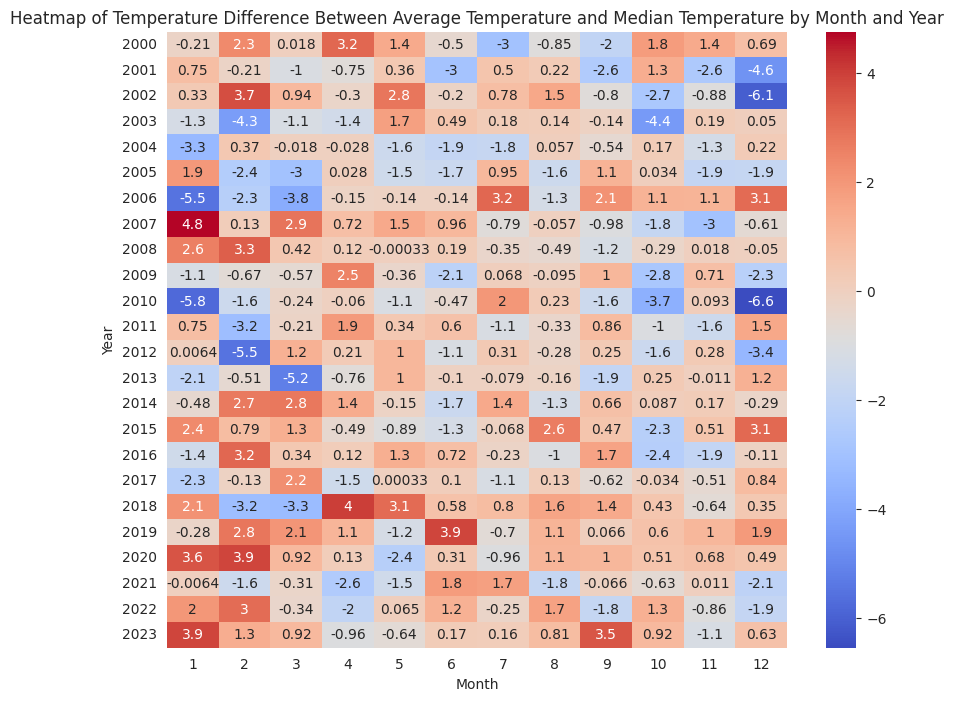

In [113]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_tab, annot=True, cmap="coolwarm")
plt.title("Heatmap of Temperature Difference Between Average Temperature and Median Temperature by Month and Year")
plt.show()

In [114]:
merged_df_positive = merged_df[merged_df['TempDiff'] > 0]
merged_df_positive.groupby('Year').size().reset_index(name='Count')

,Year,Count
0,2000,7
1,2001,5
2,2002,6
3,2003,6
4,2004,4
5,2005,5
6,2006,5
7,2007,6
8,2008,6
9,2009,4


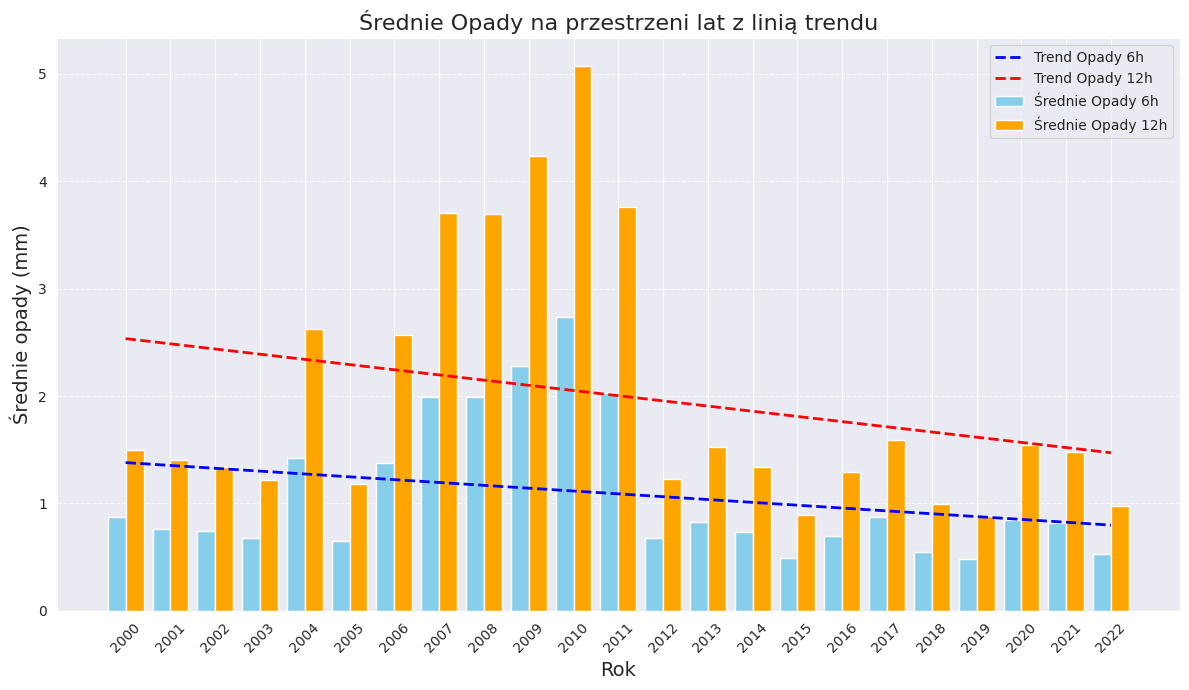

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

# Pobranie danych z bazy (zapytanie SQL do analizy opadów)
query = """
SELECT
    YEAR(data) AS Rok,
    AVG(Opady6) AS SrednieOpady6h,
    AVG(Opady12) AS SrednieOpady12h
FROM
    Synop.dbo.DaneModelTMP
WHERE
    Opady6 IS NOT NULL AND Opady12 IS NOT NULL
GROUP BY
    YEAR(data)
ORDER BY
    Rok
"""
df = pd.read_sql(query, engine)

# Wyciągnięcie danych do regresji
x = df['Rok']
y6 = df['SrednieOpady6h']
y12 = df['SrednieOpady12h']

# Obliczanie współczynników regresji dla opadów 6-godzinnych
coeff6 = np.polyfit(x, y6, 1)  # Dopasowanie liniowe
trend6 = np.polyval(coeff6, x)  # Wyliczenie wartości linii trendu

# Obliczanie współczynników regresji dla opadów 12-godzinnych
coeff12 = np.polyfit(x, y12, 1)  # Dopasowanie liniowe
trend12 = np.polyval(coeff12, x)  # Wyliczenie wartości linii trendu

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 7))
bar_width = 0.4
plt.bar(x - bar_width / 2, y6, width=bar_width, label='Średnie Opady 6h', color='skyblue')
plt.bar(x + bar_width / 2, y12, width=bar_width, label='Średnie Opady 12h', color='orange')

# Dodanie linii trendu
plt.plot(x, trend6, color='blue', linestyle='--', linewidth=2, label='Trend Opady 6h')
plt.plot(x, trend12, color='red', linestyle='--', linewidth=2, label='Trend Opady 12h')

# Dodanie etykiet i tytułu
plt.title('Średnie Opady na przestrzeni lat z linią trendu', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Średnie opady (mm)', fontsize=14)
plt.xticks(x, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

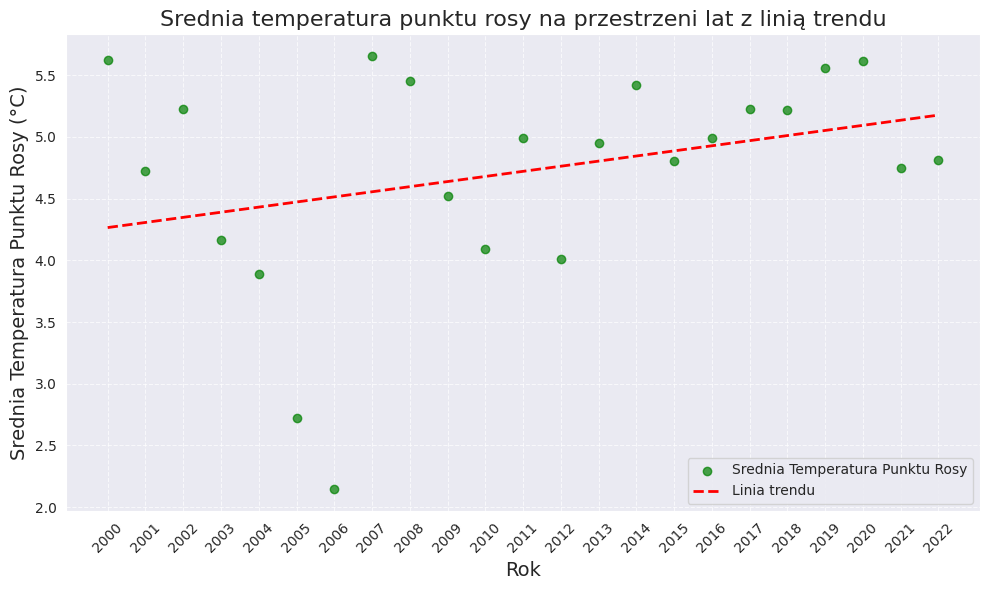

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine


# Pobranie danych z bazy (zapytanie SQL do analizy wilgotności)
query = """
SELECT
    YEAR(data) AS Rok,
    AVG(TemperaturaPunktuRosy) AS SredniaTemperaturaPunktuRosy
FROM
    Synop.dbo.DaneModelTMP
WHERE
    TemperaturaPunktuRosy IS NOT NULL and YEAR(data) BETWEEN 2000 AND 2023
GROUP BY
    YEAR(data)
ORDER BY
    Rok
"""
df = pd.read_sql(query, engine)

# Wyciągnięcie danych do regresji
x = df['Rok']
y = df['SredniaTemperaturaPunktuRosy']

# Obliczanie współczynników regresji (linia trendu)
coeff = np.polyfit(x, y, 1)  # Dopasowanie liniowe
trend = np.polyval(coeff, x)  # Wyliczenie wartości linii trendu

# Tworzenie wykresu punktowego
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green', label='Srednia Temperatura Punktu Rosy', alpha=0.7)

# Dodanie linii trendu
plt.plot(x, trend, color='red', linestyle='--', linewidth=2, label='Linia trendu')

# Dodanie etykiet i tytułu
plt.title('Srednia temperatura punktu rosy na przestrzeni lat z linią trendu', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Srednia Temperatura Punktu Rosy (°C)', fontsize=14)
plt.xticks(x, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

In [118]:
# Zapytanie SQL do analizy częstotliwości występowania zjawisk pogodowych
query = """
SELECT
    YEAR(data) AS Rok,
    SUM(CASE WHEN Deszcz6 = 1 THEN 1 ELSE 0 END) AS LiczbaDeszczy,
    SUM(CASE WHEN Snieg6 = 1 THEN 1 ELSE 0 END) AS LiczbaSniegów,
    SUM(CASE WHEN Burza6 = 1 THEN 1 ELSE 0 END) AS LiczbaBurz,
    SUM(CASE WHEN Mgla6 = 1 THEN 1 ELSE 0 END) AS LiczbaMgiel
FROM
    Synop.dbo.DaneModelTMP
WHERE
    Deszcz6 IS NOT NULL OR Snieg6 IS NOT NULL OR Burza6 IS NOT NULL OR Mgla6 IS NOT NULL and YEAR(data) BETWEEN 2000 AND 2023
GROUP BY
    YEAR(data)
ORDER BY
    Rok
"""
df = pd.read_sql(query, engine)
df

,Rok,LiczbaDeszczy,LiczbaSniegów,LiczbaBurz,LiczbaMgiel
0,2000,491,119,152,237
1,2001,459,192,170,272
2,2002,366,115,151,176
3,2003,294,157,74,289
4,2004,321,147,113,252
5,2005,313,146,110,215
6,2006,211,133,127,237
7,2007,271,109,118,191
8,2008,273,77,85,223
9,2009,244,82,127,223


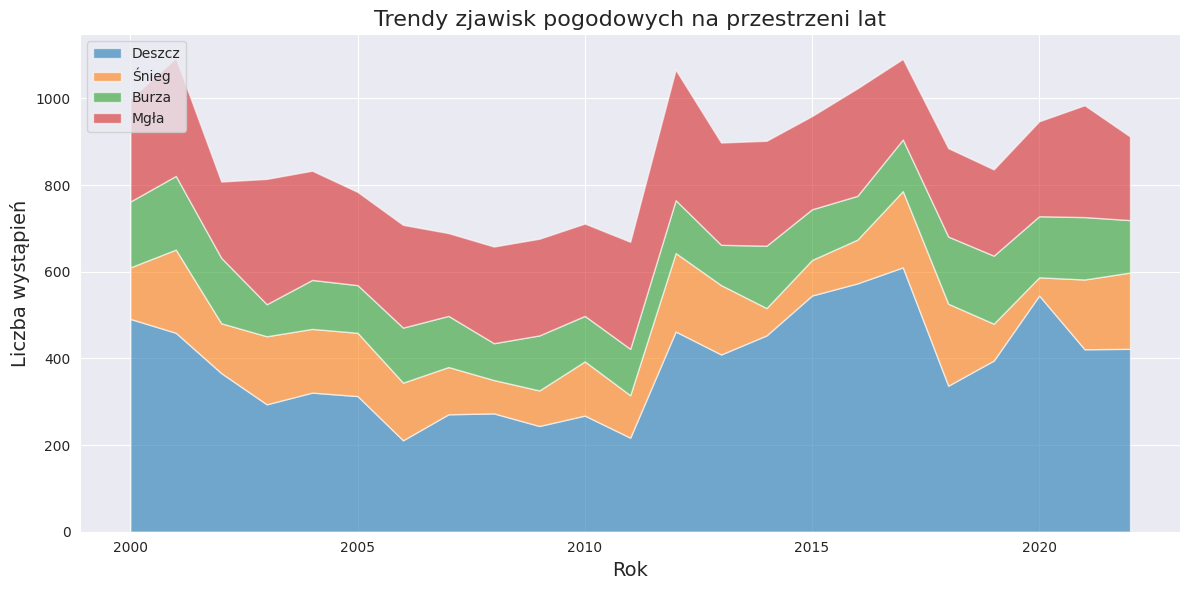

In [119]:
# Wykres powierzchniowy dla zjawisk pogodowych
plt.figure(figsize=(12, 6))

plt.stackplot(df['Rok'], df['LiczbaDeszczy'], df['LiczbaSniegów'], df['LiczbaBurz'], df['LiczbaMgiel'],
              labels=['Deszcz', 'Śnieg', 'Burza', 'Mgła'], alpha=0.6)
plt.title('Trendy zjawisk pogodowych na przestrzeni lat', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Liczba wystąpień', fontsize=14)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()